# Outliers Detection and handling

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder


In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('/Users/meetsudra/Documents/GitHub/real-estate/feature_engineered_gurgaon.csv')

In [4]:
df.sample(5)

,property_type,sector,society,price,area,price_per_sqft,built_up_area,carpet_area,super_built_up_area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1439,flat,sector 86,pyramid urban homes 2,0.41,495.0,8283.0,NaN,501.0,NaN,2,2,1,7.0,West,New Property,1,1,0,1,1,1,49
2725,flat,sector 62,emaar digihomes,3.95,2588.0,15262.0,NaN,2588.0,NaN,3,3,3,33.0,East,New Property,0,1,0,0,0,2,49
503,flat,sector 74,m3m skywalk,2.20,2018.0,10901.0,NaN,NaN,2018.0,3,3,3,12.0,NaN,New Property,1,0,0,0,0,2,15
2230,flat,sector 22,ambience creacions,4.63,3090.0,14983.0,NaN,NaN,3090.0,3,5,3+,5.0,North-East,New Property,0,1,0,0,1,1,120
2033,flat,sector 89,smart world gems,1.25,1423.0,8784.0,NaN,NaN,1423.0,3,3,3,2.0,North,Under Construction,0,0,0,1,0,1,12


In [5]:
df.shape

(3803, 22)

In [6]:
df.columns

Index(['property_type', 'sector', 'society', 'price', 'area', 'price_per_sqft',
       'built_up_area', 'carpet_area', 'super_built_up_area', 'bedRoom',
       'bathroom', 'balcony', 'floorNum', 'facing', 'agePossession',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

## price 

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1332/444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

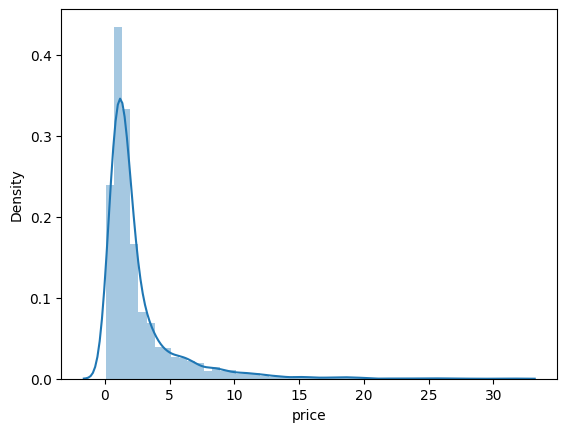

In [7]:
sns.distplot(df['price'])

highly skewed and thus will use boxplot

<Axes: xlabel='price'>

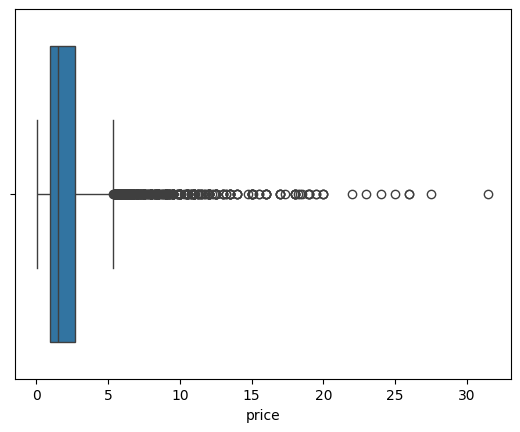

In [8]:
sns.boxplot(x=df['price'])

In [9]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

iqr = Q3-Q1

lower_bound = Q1 - 1.5*iqr
upper_bound = Q3 + 1.5*iqr

outliers = df[(df['price']<lower_bound) | (df['price']>upper_bound)]

num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(432,
 count    432.000000
 mean       9.196157
 std        4.061291
 min        5.350000
 25%        6.400000
 50%        8.000000
 75%       10.607500
 max       31.500000
 Name: price, dtype: float64)

In [10]:
outliers.sort_values('price',ascending=False).head()

,property_type,sector,society,price,area,price_per_sqft,built_up_area,carpet_area,super_built_up_area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
133,house,sector 26,arjun marg/ sector- 26 phase- 1/ golf course road,31.5,9000.0,35000.0,9000.0,NaN,NaN,7,9,3+,3.0,North-East,Moderately Old,1,1,1,1,0,0,74
2113,house,sector 43,independent,27.5,11286.0,24366.0,11286.0,NaN,NaN,6,7,3+,3.0,North-East,Relatively New,1,1,0,1,1,2,42
1537,house,sector 26,independent,26.0,3150.0,82540.0,400.0,350.0,NaN,16,16,3+,4.0,North-West,New Property,1,1,1,1,0,2,72
537,house,sector 26,dlf city plots,26.0,4545.0,57206.0,4545.0,NaN,NaN,6,7,3+,2.0,North-East,New Property,1,1,0,1,1,2,138
270,house,sector 54,suncity township,25.0,8036.0,31111.0,1000.0,NaN,NaN,4,4,3+,2.0,North,Moderately Old,1,1,1,1,0,1,0


on the basis of price col we can say that there are some genuine outliers but there are some data errors as well

## price_per_sqft

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1332/2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

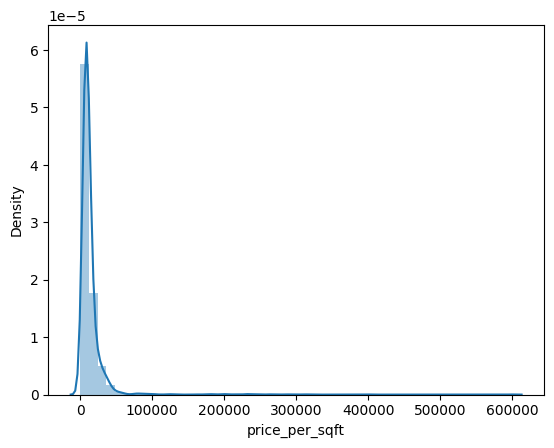

In [11]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

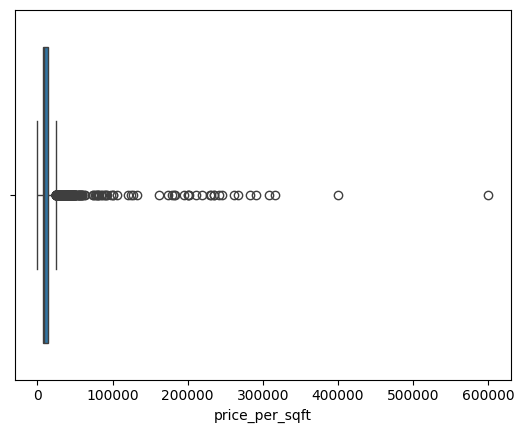

In [12]:
sns.boxplot(x=df['price_per_sqft'])

In [13]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)

iqr = Q3-Q1

lower_bound = Q1 - 1.5*iqr
upper_bound = Q3 + 1.5*iqr

outliers_sqft = df[(df['price_per_sqft']<lower_bound) | (df['price_per_sqft']>upper_bound)]

num_outliers = outliers_sqft.shape[0]
outliers_price_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_price_stats

(367,
 count       367.000000
 mean      52115.435967
 std       60746.225927
 min       24202.000000
 25%       27778.000000
 50%       33333.000000
 75%       41790.000000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [14]:
outliers_sqft.to_csv('outliers_in_price_per_sqft.csv')

In [15]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x: x*9 if x<1000 else x)

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1332/2889327692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x: x*9 if x<1000 else x)


In [16]:
outliers_sqft['price_per_sqft'] = round(outliers_sqft['price']*10000000/outliers_sqft['area']) # recalculated the price values 

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1332/573815469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round(outliers_sqft['price']*10000000/outliers_sqft['area']) # recalculated the price values


In [17]:
outliers_sqft['price_per_sqft'].describe()

count      367.000000
mean     29160.735695
std      12308.413881
min       2689.000000
25%      25051.500000
50%      29630.000000
75%      35489.000000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [18]:
df.update(outliers_sqft)

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1332/2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

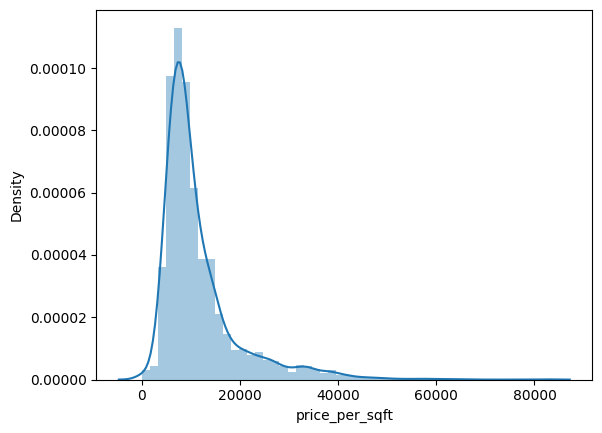

In [19]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

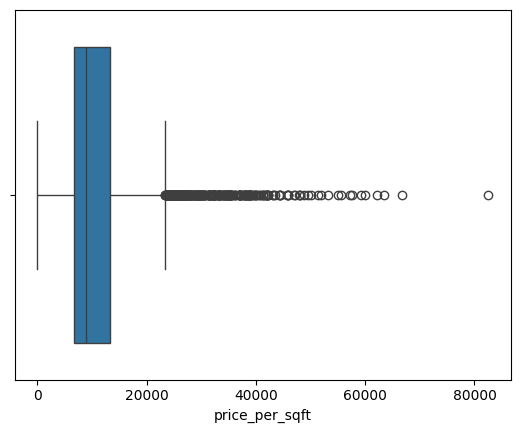

In [20]:
sns.boxplot(x=df['price_per_sqft'])

In [21]:
df[df['price_per_sqft']>50000].shape[0]

13

In [22]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

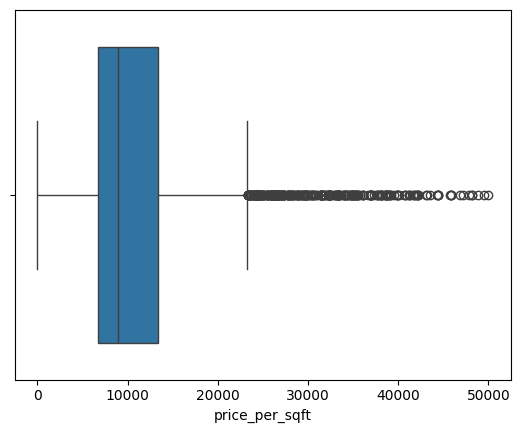

In [23]:
sns.boxplot(x=df['price_per_sqft'])

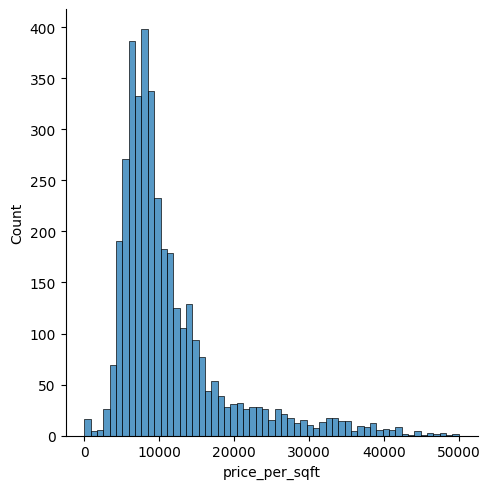

In [24]:
sns.displot(df['price_per_sqft'])

## area

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1332/91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

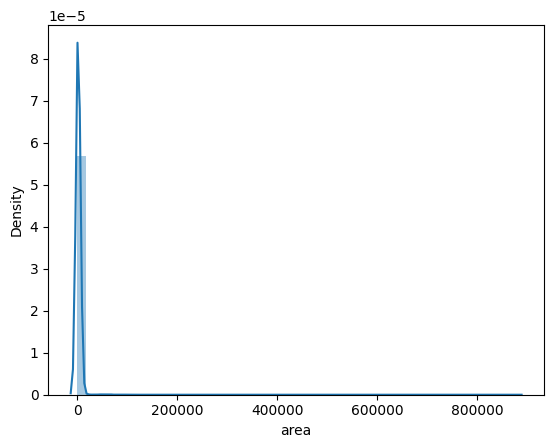

In [25]:
sns.distplot(df['area'])

<Axes: ylabel='area'>

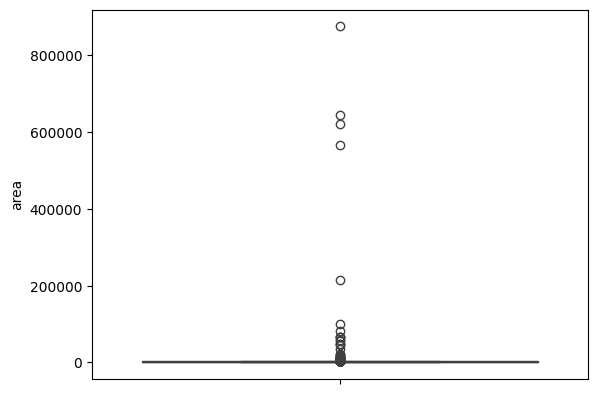

In [26]:
sns.boxplot(df['area'])

outliers range till 9lacs sqft which is not possible interms of houses and flats

In [27]:
df['area'].describe()

count      3772.00000
mean       2906.69035
std       22822.30511
min         145.00000
25%        1257.75000
50%        1745.00000
75%        2340.00000
max      875000.00000
Name: area, dtype: float64

In [28]:
df[df['area']>100000]

,property_type,sector,society,price,area,price_per_sqft,built_up_area,carpet_area,super_built_up_area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
850,flat,sector 107,signature global solera 2,0.51,566667.0,9.0,NaN,514396.0,NaN,2,2,1,3.0,North,New Property,0,0,0,0,0,1,44
1742,flat,sohna road,hcbs sports ville,0.35,875000.0,4.0,737147.0,NaN,NaN,2,2,2,8.0,NaN,Relatively New,0,0,0,0,0,0,44
2419,flat,sector 95,ramsons kshitij,0.31,620000.0,5.0,NaN,607936.0,NaN,2,2,1,1.0,North-East,Relatively New,1,0,0,0,1,1,65
3142,flat,sector 95,signature the roselia,0.45,642857.0,7.0,NaN,569243.0,NaN,2,2,2,2.0,South-West,New Property,0,0,0,0,0,1,76
3559,house,sector 50,independent,5.00,215517.0,232.0,2.0,NaN,NaN,6,5,3+,2.0,NaN,New Property,1,1,0,1,1,2,0


In [29]:
df = df[df['area']<100000]

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1332/91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

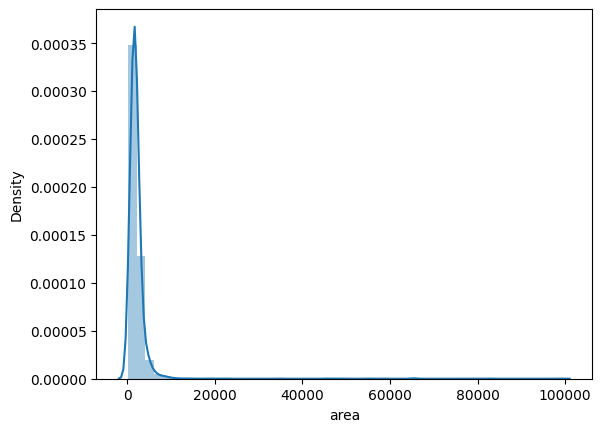

In [30]:
sns.distplot(df['area'])

<Axes: ylabel='area'>

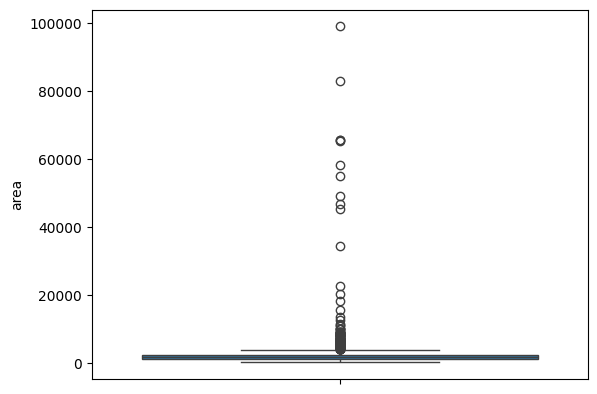

In [31]:
sns.boxplot(df['area'])

In [32]:
df[df['area'] > 10000].sort_values('area',ascending=False)

# after manually checking following rows:
# 3190, 239, 3620, 1189, 2382, 3597, 3027, 3767, 718 we found that they are data errors for sure

,property_type,sector,society,price,area,price_per_sqft,built_up_area,carpet_area,super_built_up_area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3190,house,sector 26,independent,18.40,98978.0,1859.0,NaN,11000.00,NaN,6,8,3+,4.0,South,Relatively New,0,1,1,1,0,2,60
739,house,sector 13,ganpati heights apartment,1.25,82781.0,151.0,115.0,NaN,NaN,10,6,2,3.0,South-East,Old Property,0,0,0,0,1,1,7
239,flat,sector 95,rof ananda,0.38,65517.0,58.0,NaN,64529.00,NaN,2,2,2,10.0,East,New Property,1,0,0,0,0,1,15
3620,flat,sector 95,rof ananda,0.38,65517.0,58.0,NaN,64412.00,NaN,3,2,1,12.0,North,Relatively New,0,0,0,0,0,1,51
862,house,sector 28,dlf city plot phase 4,13.00,65261.0,1992.0,NaN,7250.00,NaN,10,10,3+,1.0,NaN,Undefined,0,0,0,0,0,1,0
1189,flat,sector 86,pyramid elite,0.46,58228.0,79.0,NaN,58141.00,NaN,2,2,1,0.0,NaN,Under Construction,0,0,0,0,0,1,15
2382,flat,sector 95,rof ananda,0.33,55000.0,60.0,NaN,54917.00,NaN,2,2,1,13.0,South-West,Relatively New,0,0,0,0,0,1,37
3597,flat,sohna road,signature the serenas,0.28,49123.0,57.0,NaN,48811.00,NaN,1,1,2,1.0,North-West,Relatively New,1,0,0,0,0,1,37
2135,house,sector 25,independent,7.30,46795.0,1560.0,5800.0,5200.00,NaN,9,9,2,3.0,North-West,Relatively New,0,1,1,0,0,2,109
3027,flat,sector 95,ramsons kshitij,0.24,45283.0,53.0,NaN,45966.00,NaN,2,2,1,10.0,North-West,Relatively New,0,0,0,0,1,1,33


In [33]:
df.drop(index=[3190, 239, 3620, 1189, 2389, 3597, 3027, 3767, 718, 2382],inplace=True)

In [34]:
df[df['area']>10000].sort_values('area',ascending=False)

,property_type,sector,society,price,area,price_per_sqft,built_up_area,carpet_area,super_built_up_area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
739,house,sector 13,ganpati heights apartment,1.25,82781.0,151.0,115.0,NaN,NaN,10,6,2,3.0,South-East,Old Property,0,0,0,0,1,1,7
862,house,sector 28,dlf city plot phase 4,13.00,65261.0,1992.0,NaN,7250.00,NaN,10,10,3+,1.0,NaN,Undefined,0,0,0,0,0,1,0
2135,house,sector 25,independent,7.30,46795.0,1560.0,5800.0,5200.00,NaN,9,9,2,3.0,North-West,Relatively New,0,1,1,0,0,2,109
2056,house,sector 57,independent,6.25,22498.0,2778.0,2660.0,2500.00,NaN,9,9,3+,3.0,North-East,New Property,0,1,0,0,0,2,61
523,house,sector 43,independent,5.50,20250.0,2716.0,2850.0,2250.00,NaN,8,7,3+,3.0,East,Moderately Old,1,1,0,1,1,2,123
703,flat,sector 85,godrej air,2.50,18129.0,1379.0,NaN,18122.00,NaN,4,5,3+,16.0,North-East,Under Construction,1,0,0,1,1,2,44
3054,house,sector 50,unitech aspen greens,6.95,15479.0,4490.0,2160.0,1720.00,NaN,3,3,1,2.0,North-East,Moderately Old,0,1,0,0,0,1,160
538,flat,sector 88a,godrej icon,1.75,12645.0,1384.0,NaN,1175.11,NaN,3,3,3+,6.0,NaN,New Property,0,0,0,0,0,1,55
2113,house,sector 43,independent,27.50,11286.0,24366.0,11286.0,NaN,NaN,6,7,3+,3.0,North-East,Relatively New,1,1,0,1,1,2,42
790,flat,sector 65,m3m golfestate,13.20,11000.0,12000.0,NaN,11000.00,NaN,4,4,3,13.0,North,Moderately Old,0,1,0,0,0,1,60


In [35]:
df.loc[739,'area'] = 115*9
df.loc[862,'area'] = 7250
df.loc[2135,'area'] = 5800
df.loc[2056,'area'] = 2660
df.loc[523,'area'] = 2850
df.loc[703,'area'] = 1812
df.loc[3054,'area'] = 2160
df.loc[538,'area'] = 1175

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1332/91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

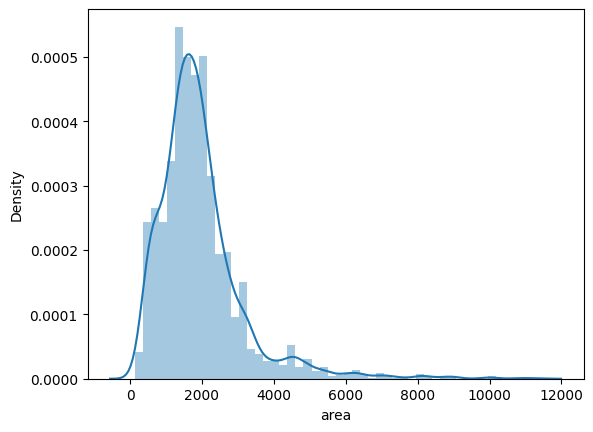

In [36]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

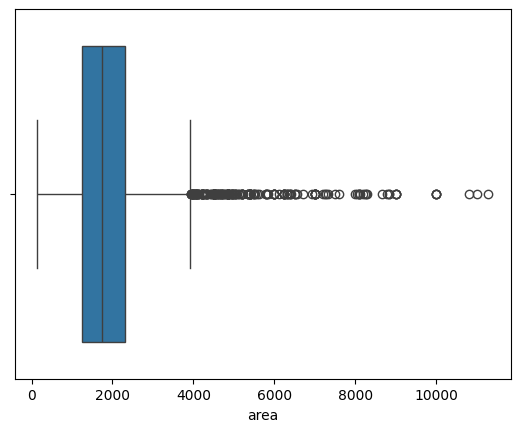

In [37]:
sns.boxplot(x=df['area'])

In [38]:
df['area'].describe()

count     3757.000000
mean      1942.320468
std       1213.841730
min        145.000000
25%       1250.000000
50%       1742.000000
75%       2318.000000
max      11286.000000
Name: area, dtype: float64

## bedRoom

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1332/1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

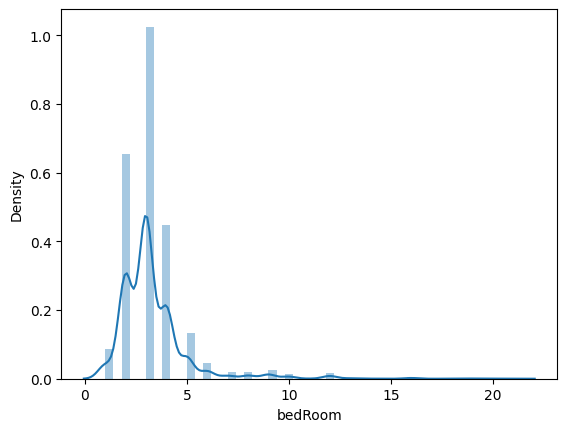

In [39]:
sns.distplot(df['bedRoom'])

<Axes: ylabel='area'>

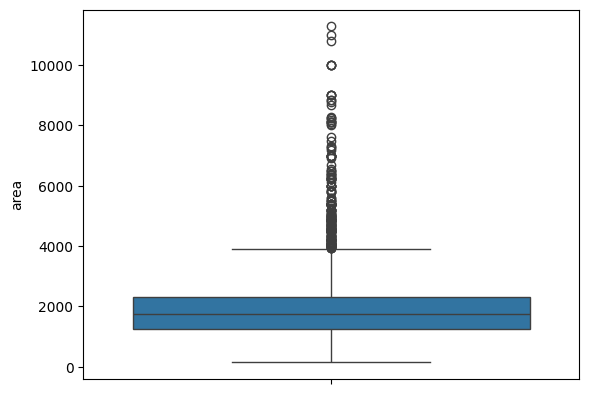

In [40]:
sns.boxplot(df['area'])

In [41]:
df['bedRoom'].describe()

count    3757.000000
mean        3.311685
std         1.810367
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [42]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False).shape[0]

45

In [43]:
df = df[df['bedRoom']<=10]

In [44]:
df.shape

(3712, 22)

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1332/1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

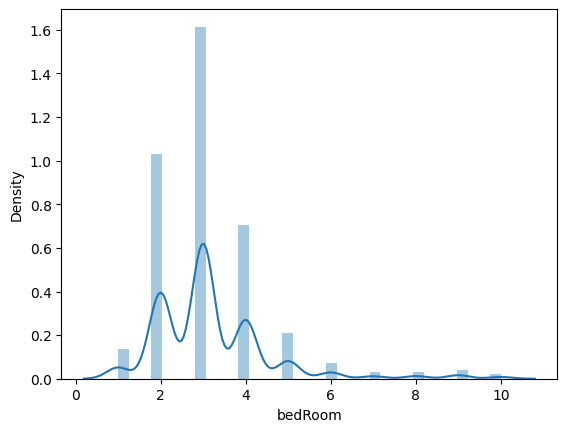

In [45]:
sns.distplot(df['bedRoom'])

<Axes: ylabel='bedRoom'>

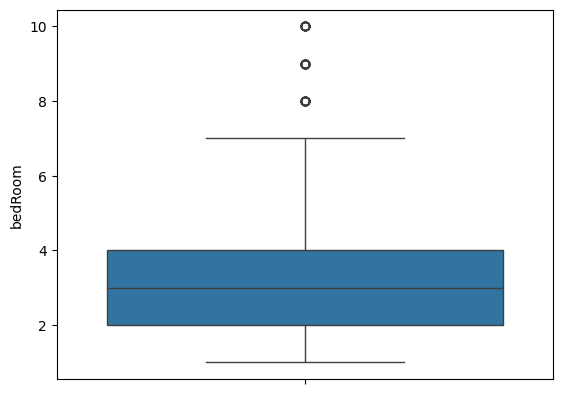

In [46]:
sns.boxplot(df['bedRoom'])

## bathroom

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1332/2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

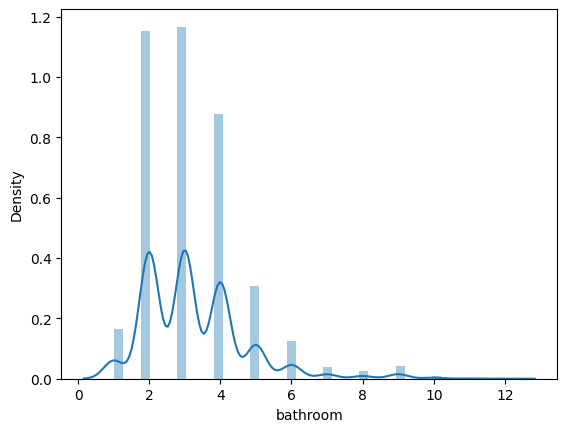

In [47]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

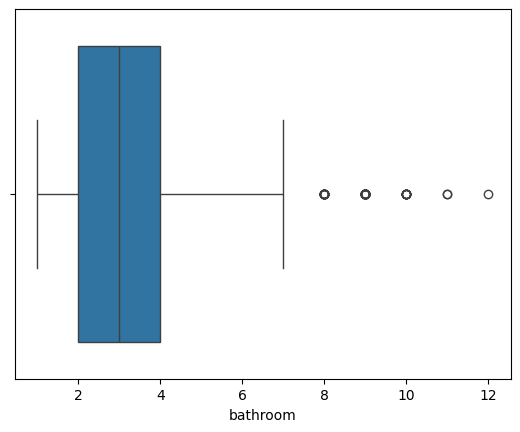

In [48]:
sns.boxplot(x=df['bathroom'])

In [49]:
df[df['bathroom']>10].sort_values('bathroom',ascending=False)

,property_type,sector,society,price,area,price_per_sqft,built_up_area,carpet_area,super_built_up_area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1397,house,sector 60,adani brahma samsara,18.02,6390.0,28200.0,6390.0,NaN,NaN,9,12,3+,3.0,North-East,Relatively New,0,1,0,0,0,2,146
699,house,sector 24,independent,11.00,3806.0,28902.0,5000.0,NaN,NaN,8,11,3+,3.0,East,Old Property,1,1,0,1,1,2,39
1846,house,sector 39,independent,7.00,7000.0,10000.0,7000.0,NaN,NaN,10,11,3+,4.0,South-East,Relatively New,0,0,0,1,0,2,38


## super built up area

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1332/4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

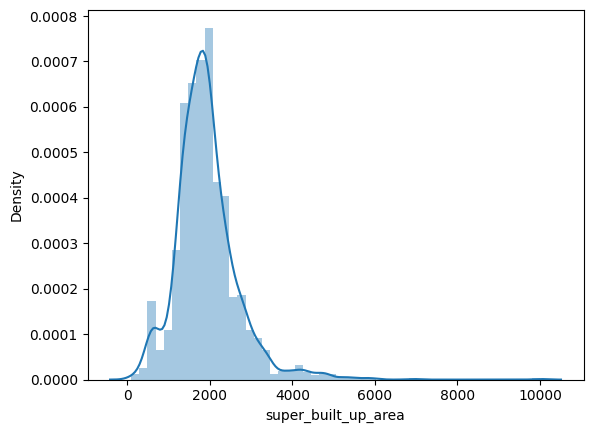

In [50]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

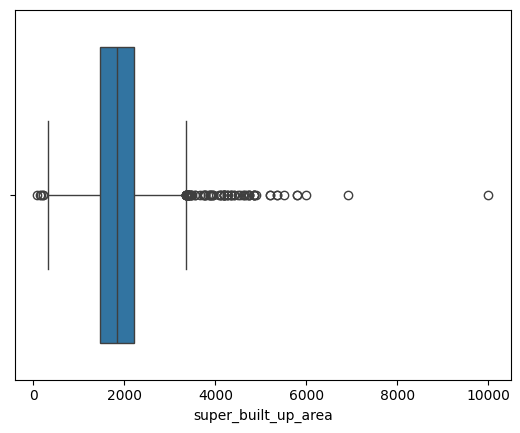

In [51]:
sns.boxplot(x=df['super_built_up_area'])

In [52]:
df['super_built_up_area'].describe()

count     1915.000000
mean      1921.658251
std        767.160169
min         89.000000
25%       1457.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [53]:
df[df['super_built_up_area'] > 6000]

,property_type,sector,society,price,area,price_per_sqft,built_up_area,carpet_area,super_built_up_area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
702,flat,sector 81,bestech park view grand spa,4.7,6926.0,6786.0,NaN,NaN,6926.0,4,4,3+,19.0,North,Relatively New,0,1,0,0,0,2,140
1309,flat,gwal pahari,krrish provence estate,7.5,10000.0,7500.0,NaN,NaN,10000.0,5,6,3+,23.0,North-East,Relatively New,0,1,0,1,1,1,49


properties seems genuine 

## built_up_area

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1332/3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

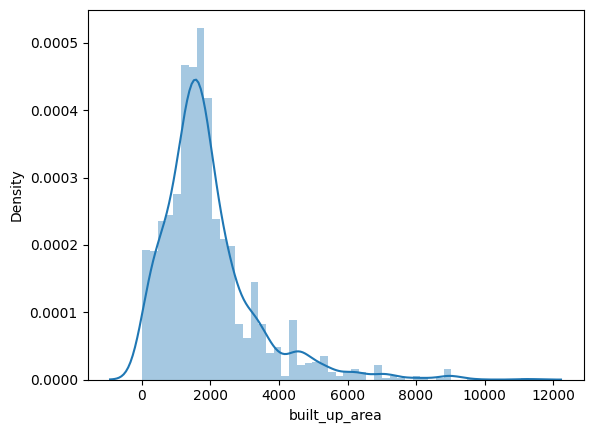

In [54]:
sns.distplot(df['built_up_area'])

<Axes: ylabel='built_up_area'>

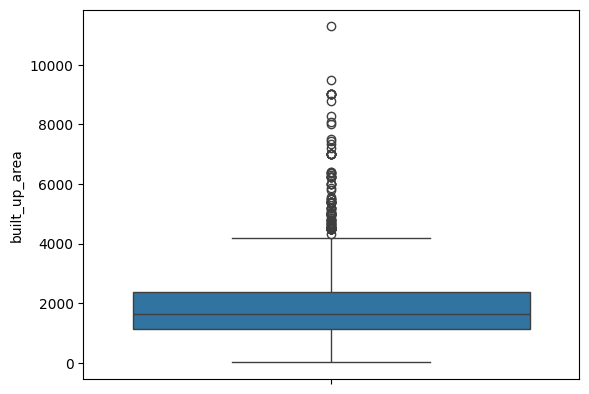

In [55]:
sns.boxplot(df['built_up_area'])

In [56]:
df[df['built_up_area']>10000]

,property_type,sector,society,price,area,price_per_sqft,built_up_area,carpet_area,super_built_up_area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2113,house,sector 43,independent,27.5,11286.0,24366.0,11286.0,NaN,NaN,6,7,3+,3.0,North-East,Relatively New,1,1,0,1,1,2,42


## carpet_area

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1332/3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

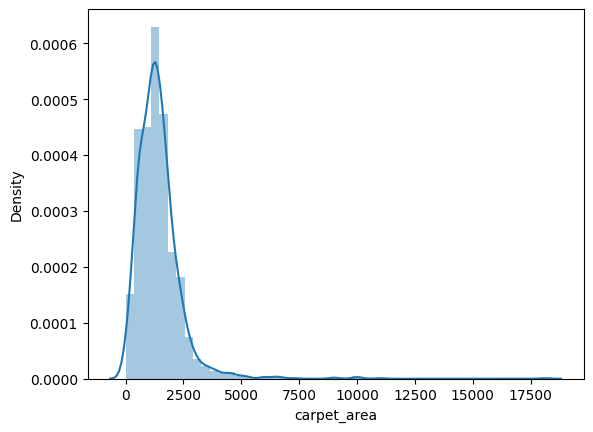

In [57]:
sns.distplot(df['carpet_area'])

<Axes: ylabel='carpet_area'>

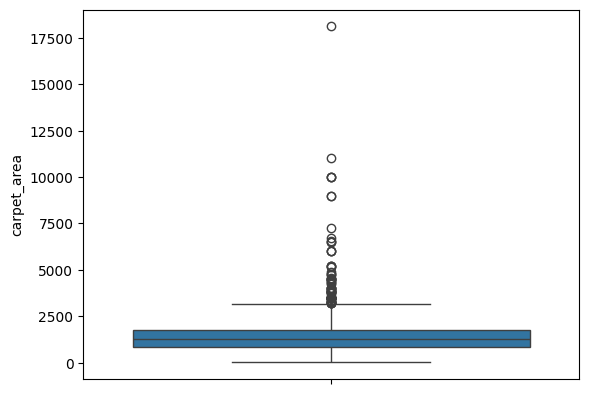

In [58]:
sns.boxplot(df['carpet_area'])

In [59]:
df[df['carpet_area']>10000]

,property_type,sector,society,price,area,price_per_sqft,built_up_area,carpet_area,super_built_up_area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
703,flat,sector 85,godrej air,2.5,1812.0,1379.0,NaN,18122.0,NaN,4,5,3+,16.0,North-East,Under Construction,1,0,0,1,1,2,44
790,flat,sector 65,m3m golfestate,13.2,11000.0,12000.0,NaN,11000.0,NaN,4,4,3,13.0,North,Moderately Old,0,1,0,0,0,1,60


In [60]:
df.loc[703,'carpet_area'] = 1812 # mistake corrected which might have occured before

<Axes: ylabel='carpet_area'>

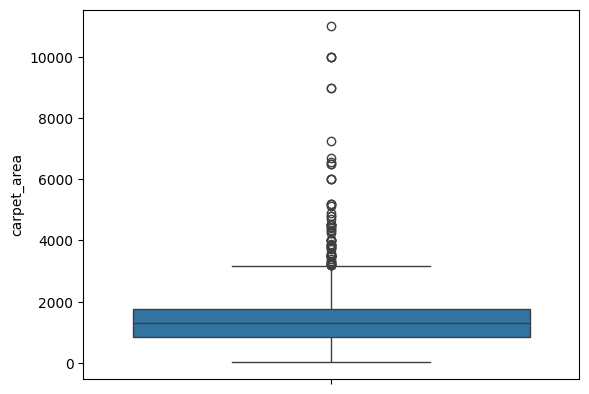

In [61]:
sns.boxplot(df['carpet_area'])

## luxury_score

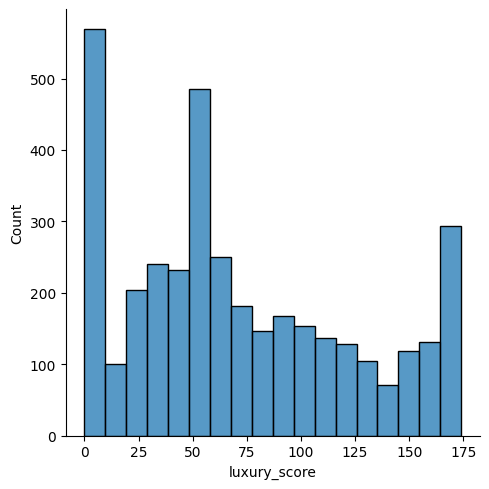

In [62]:
sns.displot(df['luxury_score'])

<Axes: ylabel='luxury_score'>

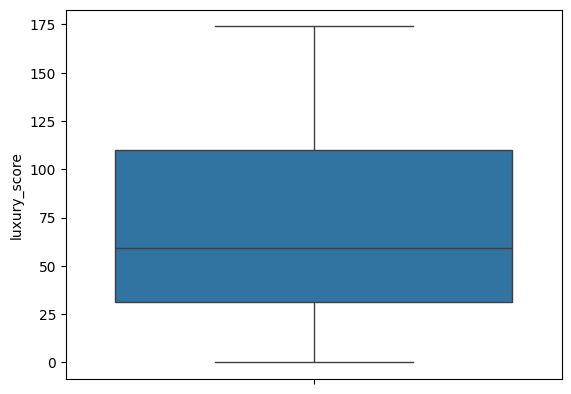

In [63]:
sns.boxplot(df['luxury_score'])

## price_per_sqft
recalculating price_per_sqft column

In [64]:
df['price_per_sqft'] = round(df['price']*10000000/df['area'],2)

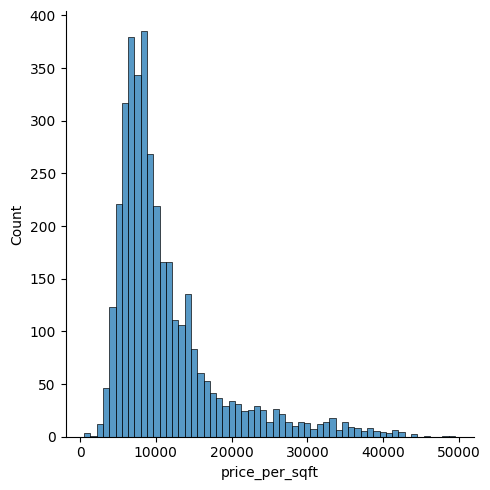

In [65]:
sns.displot(df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

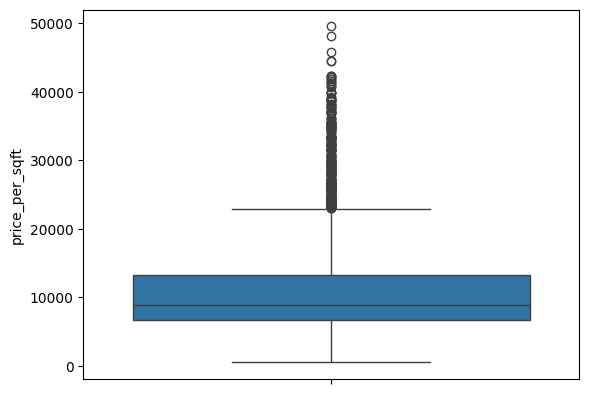

In [66]:
sns.boxplot(df['price_per_sqft'])

In [67]:
df['price_per_sqft'].describe()

count     3712.000000
mean     11226.588979
std       7015.840756
min        544.000000
25%       6739.930000
50%       8888.890000
75%      13224.540000
max      49500.000000
Name: price_per_sqft, dtype: float64

In [68]:
df[df['price_per_sqft']>42000]

,property_type,sector,society,price,area,price_per_sqft,built_up_area,carpet_area,super_built_up_area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
55,house,sector 26,independent,19.0,4500.0,42222.22,4500.0,NaN,NaN,6,8,3+,3.0,East,Moderately Old,1,1,1,1,0,2,103
2355,house,sector 55,independent,5.0,1125.0,44444.44,115.0,100.0,NaN,9,9,3+,5.0,East,New Property,0,0,0,0,1,2,44
2795,house,sector 105,independent,9.9,2000.0,49500.00,2000.0,1800.0,NaN,2,2,2,3.0,North,Undefined,0,0,0,0,0,1,0
2978,house,sector 43,independent,9.5,2250.0,42222.22,300.0,250.0,NaN,5,5,3+,2.0,North-East,Relatively New,0,1,0,1,0,2,88
3474,house,sector 25,independent,13.0,2844.0,45710.27,2844.0,NaN,NaN,6,8,3+,NaN,NaN,Relatively New,1,1,1,1,0,0,0
3508,house,sector 26,independent,20.0,4500.0,44444.44,4500.0,NaN,NaN,5,7,3+,3.0,West,Relatively New,0,1,0,1,0,0,97
3577,house,sector 26,dlf city plots,19.0,4518.0,42054.01,4518.0,NaN,NaN,6,6,3,2.0,East,Relatively New,1,1,0,0,0,2,121
3609,house,sector 28,independent,12.0,2844.0,42194.09,2844.0,NaN,NaN,4,5,3+,4.0,East,Relatively New,0,1,1,1,0,2,60
3648,house,sector 43,sushant lok 1 builder floors,13.0,2700.0,48148.15,2700.0,NaN,NaN,3,3,3+,4.0,North,New Property,0,0,0,1,0,2,7


If u closely give a look on area and no of bedrooms of index 2355, u find it suspicious.
Thus 

In [69]:
x = df[df['price_per_sqft']<=20000] # mostly correct values
(x['area']/x['bedRoom']).quantile(0.05) # 2 percentile par fraction ki 190 value he, means issee niche valo ko outliers consider kar sakte 

257.0

In [70]:
df[(df['area']/df['bedRoom'])<257]

,property_type,sector,society,price,area,price_per_sqft,built_up_area,carpet_area,super_built_up_area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
9,house,sector 9,independent,0.60,558.0,10752.69,558.0,NaN,NaN,3,3,1,2.0,NaN,Relatively New,0,0,0,0,0,1,0
24,house,sector 43,independent,5.30,1935.0,27390.18,1935.0,NaN,NaN,9,9,3+,3.0,East,Moderately Old,0,1,0,0,0,2,71
36,flat,sohna road,tulsiani easy in homes,0.40,505.0,7920.79,NaN,505.000000,NaN,2,2,3,9.0,NaN,Under Construction,0,0,0,0,0,1,36
39,house,sector 4,independent,0.47,443.0,10609.48,50.0,48.000000,NaN,2,2,1,2.0,East,New Property,1,0,0,0,0,2,73
56,house,sector 21,independent,0.45,535.0,8411.21,NaN,535.000000,NaN,3,2,1,1.0,NaN,Undefined,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3736,house,sohna road road,independent,1.20,538.0,22304.83,535.0,NaN,NaN,4,4,3+,4.0,West,Old Property,0,0,0,0,0,1,8
3747,flat,sector 95,rof ananda,0.38,644.0,5900.62,NaN,644.111776,NaN,3,2,1,2.0,South-East,Relatively New,0,0,0,1,0,2,66
3751,house,sector 8,independent,0.49,436.0,11238.53,360.0,NaN,NaN,6,3,2,3.0,East,Moderately Old,0,0,0,0,0,1,8
3760,house,sohna road road,independent,0.95,1065.0,8920.19,1065.0,NaN,NaN,10,10,3+,3.0,NaN,New Property,0,0,0,0,0,1,0


Ye 204 points me there is some problem

In [71]:
df['price_per_sqft'].isnull().sum()

0

In [72]:
df.head()

,property_type,sector,society,price,area,price_per_sqft,built_up_area,carpet_area,super_built_up_area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 86,ansal heights 86,0.78,1360.0,5735.29,1360.0,NaN,NaN,2,2,2,8.0,North,New Property,0,0,0,0,0,1,72
1,flat,sector 103,indiabulls centrum park,1.05,1792.0,5859.38,1365.0,900.0,NaN,2,2,3,1.0,West,Relatively New,0,0,0,0,0,2,51
2,flat,sector 70a,bptp astaire gardens,0.97,1473.0,6585.20,NaN,NaN,1480.0,3,3,3+,1.0,West,Relatively New,0,0,0,0,1,1,149
3,flat,sector 69,tulip violet,2.05,2060.0,9951.46,NaN,NaN,2087.0,4,4,2,0.0,North-West,Relatively New,0,0,0,0,0,1,157
5,flat,sector 92,bestech park view sanskruti,1.83,2325.0,7870.97,NaN,NaN,2325.0,4,3,3,8.0,East,New Property,0,1,0,0,0,1,128


In [73]:
df.shape

(3712, 22)

In [74]:
df[(df['area']/df['bedRoom'])<257]

,property_type,sector,society,price,area,price_per_sqft,built_up_area,carpet_area,super_built_up_area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
9,house,sector 9,independent,0.60,558.0,10752.69,558.0,NaN,NaN,3,3,1,2.0,NaN,Relatively New,0,0,0,0,0,1,0
24,house,sector 43,independent,5.30,1935.0,27390.18,1935.0,NaN,NaN,9,9,3+,3.0,East,Moderately Old,0,1,0,0,0,2,71
36,flat,sohna road,tulsiani easy in homes,0.40,505.0,7920.79,NaN,505.000000,NaN,2,2,3,9.0,NaN,Under Construction,0,0,0,0,0,1,36
39,house,sector 4,independent,0.47,443.0,10609.48,50.0,48.000000,NaN,2,2,1,2.0,East,New Property,1,0,0,0,0,2,73
56,house,sector 21,independent,0.45,535.0,8411.21,NaN,535.000000,NaN,3,2,1,1.0,NaN,Undefined,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3736,house,sohna road road,independent,1.20,538.0,22304.83,535.0,NaN,NaN,4,4,3+,4.0,West,Old Property,0,0,0,0,0,1,8
3747,flat,sector 95,rof ananda,0.38,644.0,5900.62,NaN,644.111776,NaN,3,2,1,2.0,South-East,Relatively New,0,0,0,1,0,2,66
3751,house,sector 8,independent,0.49,436.0,11238.53,360.0,NaN,NaN,6,3,2,3.0,East,Moderately Old,0,0,0,0,0,1,8
3760,house,sohna road road,independent,0.95,1065.0,8920.19,1065.0,NaN,NaN,10,10,3+,3.0,NaN,New Property,0,0,0,0,0,1,0


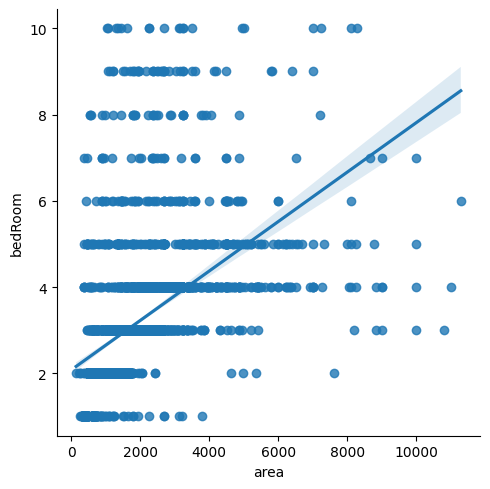

In [75]:
sns.lmplot(data=df, x='area', y='bedRoom')

houses with less then 2k sq feet have more then 7,8 bedRooms and this is problematic

In [76]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [77]:
df[df['area_room_ratio']<257].sort_values(by='area_room_ratio',ascending=True)

,property_type,sector,society,price,area,price_per_sqft,built_up_area,carpet_area,super_built_up_area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
587,house,sector 28,independent,0.75,360.0,20833.33,360.0,NaN,NaN,7,4,3+,4.0,NaN,Moderately Old,0,0,0,0,0,1,7,51.428571
97,house,sector 3 phase 3 extension,ashok vihar phase iii extension,0.40,450.0,8888.89,450.0,NaN,NaN,7,4,3+,4.0,NaN,New Property,0,0,0,1,0,1,7,64.285714
3035,house,sector 105,independent,0.60,540.0,11111.11,540.0,NaN,NaN,8,4,3,3.0,West,New Property,0,0,0,0,0,1,17,67.500000
2258,house,sector 43,ansal,1.85,540.0,34259.26,60.0,NaN,NaN,8,8,3+,5.0,North-West,Relatively New,0,0,0,0,0,1,53,67.500000
855,house,sector 6,independent,0.50,360.0,13888.89,360.0,NaN,NaN,5,3,3,3.0,NaN,Old Property,0,0,0,0,0,1,0,72.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,flat,sector 86,pyramid urban homes 2,0.43,501.0,8582.83,NaN,501.0,NaN,2,2,1,6.0,North-East,New Property,0,0,0,0,1,1,72,250.500000
3349,flat,sector 86,pyramid urban homes 2,0.43,501.0,8582.83,NaN,501.0,NaN,2,2,1,6.0,North-East,New Property,1,0,0,0,0,1,92,250.500000
36,flat,sohna road,tulsiani easy in homes,0.40,505.0,7920.79,NaN,505.0,NaN,2,2,3,9.0,NaN,Under Construction,0,0,0,0,0,1,36,252.500000
1914,flat,sector 104,zara aavaas,0.65,763.0,8519.00,NaN,763.0,NaN,3,2,2,7.0,NaN,New Property,0,0,0,0,0,1,65,254.333333


There might be two reasons:
1. While entering the details of "house", user might be showing attributes of a plot. (areaWithType) column corresponding to these values show plot area only. 
2. floornum might mean that a house is of 3 floors and 2 bedrooms in each floor, if floornum = 3 and bedroom = 6 in less then 400sqft 

In [78]:
df = df[df['area_room_ratio']>100] # removed all ratios below 100sqft (pure outliers)

In [79]:
outliers_df = df[(df['area_room_ratio']<250) & (df['bedRoom']>3)] # these are the rows with ratio less then 250 having more then 3 bedrooms which is not possible technically, but if floorNum are in multiples then it is and hence will replace it with bedRooms in each floor

In [80]:
outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1332/3450078040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [81]:
df.update(outliers_df)

In [82]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [83]:
df[(df['area_room_ratio']<250) & (df['bedRoom']>4)]

,property_type,sector,society,price,area,price_per_sqft,built_up_area,carpet_area,super_built_up_area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
367,house,sector 7,shivpuri,2.80,2250.0,12444.44,2250.0,NaN,NaN,10,7,3,1.0,NaN,Old Property,1,1,0,1,1,2,0,225.000000
629,house,sector 2,independent,0.98,1080.0,9074.07,NaN,120.0,NaN,9,4,3,1.0,South,Undefined,0,0,0,0,0,1,0,120.000000
851,house,manesar,independent,1.10,1782.0,6172.84,1782.0,NaN,NaN,8,8,0,1.0,NaN,New Property,0,0,0,0,0,1,0,222.750000
1043,house,sector 6,"bhim nagar, sector 6",0.85,603.0,14096.19,67.0,NaN,NaN,5,2,2,1.0,NaN,Old Property,0,0,0,1,0,1,29,120.600000
1216,house,sector 105,independent,1.10,900.0,12222.22,NaN,900.0,NaN,6,4,1,1.0,South-West,Undefined,0,0,0,0,0,1,0,150.000000
1648,house,sector 17,independent,0.32,565.0,5663.72,565.0,NaN,NaN,5,1,0,1.0,NaN,Undefined,0,0,0,0,0,1,0,113.000000
1775,house,sector 11,independent,3.50,2250.0,15555.56,2250.0,NaN,NaN,10,1,0,1.0,NaN,New Property,0,0,0,0,0,1,0,225.000000
2302,house,sector 3 phase 2,independent,1.10,1100.0,10000.00,1100.0,900.0,NaN,5,4,2,1.0,East,Undefined,0,0,0,0,0,1,0,220.000000
2693,house,manesar,independent,0.80,1200.0,6666.67,1200.0,NaN,NaN,8,8,2,1.0,NaN,Relatively New,0,0,0,0,0,1,0,150.000000
2750,house,sector 12,independent,2.50,1800.0,13888.89,1800.0,NaN,NaN,9,5,2,1.0,South-East,Old Property,0,0,0,1,0,1,8,200.000000


simply removed them

In [84]:
df = df[~((df['area_room_ratio']<250) & (df['bedRoom']>4))]

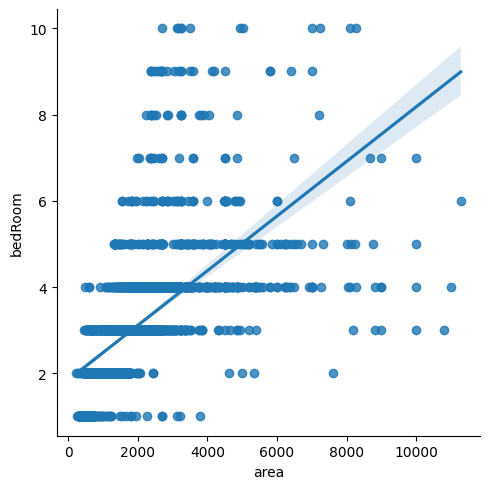

In [85]:
sns.lmplot(data=df, x='area', y='bedRoom')

Now we can see some points in the top left corner are missing

In [86]:
df.shape

(3679, 23)

In [87]:
df.head()

,property_type,sector,society,price,area,price_per_sqft,built_up_area,carpet_area,super_built_up_area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,sector 86,ansal heights 86,0.78,1360.0,5735.29,1360.0,NaN,NaN,2,2,2,8.0,North,New Property,0,0,0,0,0,1,72,680.00
1,flat,sector 103,indiabulls centrum park,1.05,1792.0,5859.38,1365.0,900.0,NaN,2,2,3,1.0,West,Relatively New,0,0,0,0,0,2,51,896.00
2,flat,sector 70a,bptp astaire gardens,0.97,1473.0,6585.20,NaN,NaN,1480.0,3,3,3+,1.0,West,Relatively New,0,0,0,0,1,1,149,491.00
3,flat,sector 69,tulip violet,2.05,2060.0,9951.46,NaN,NaN,2087.0,4,4,2,0.0,North-West,Relatively New,0,0,0,0,0,1,157,515.00
5,flat,sector 92,bestech park view sanskruti,1.83,2325.0,7870.97,NaN,NaN,2325.0,4,3,3,8.0,East,New Property,0,1,0,0,0,1,128,581.25


In [88]:
df.to_csv('gurgaor_outliers_treated.csv',index=False)

# Missing value Imputation

In [89]:
df.isnull().sum()

property_type             0
sector                    0
society                   1
price                     0
area                      0
price_per_sqft            0
built_up_area          2050
carpet_area            1768
super_built_up_area    1764
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1070
agePossession             0
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

# built_up_area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

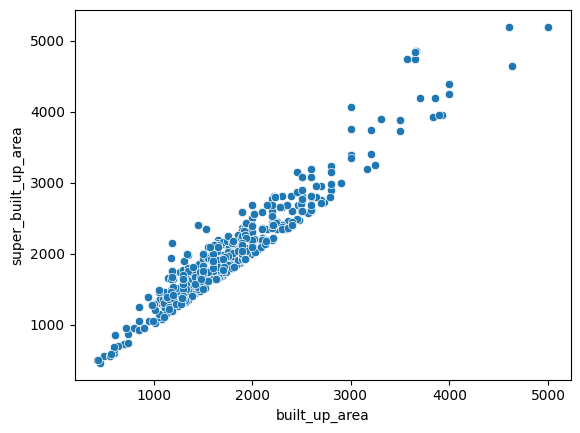

In [90]:
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'])

strong linear relationship

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

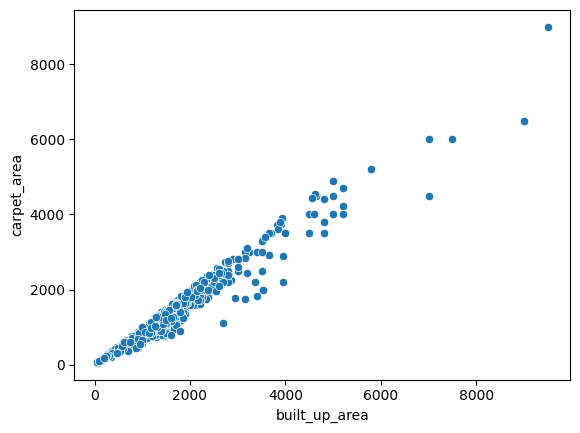

In [91]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

In [92]:
df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

,property_type,sector,society,price,area,price_per_sqft,built_up_area,carpet_area,super_built_up_area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio


In [93]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [94]:
super_TO_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [95]:
carpet_TO_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [96]:
print(super_TO_built_up_ratio, carpet_TO_built_up_ratio)

1.1048701298701298 0.900140056022409


In [97]:
# both super and carpet are present but built_area are null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [98]:
sbc_df.shape[0]

428

In [99]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1332/1215074969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1332/1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [100]:
df.update(sbc_df)

In [101]:
df.isnull().sum()

property_type             0
sector                    0
society                   1
price                     0
area                      0
price_per_sqft            0
built_up_area          1622
carpet_area            1768
super_built_up_area    1764
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1070
agePossession             0
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [102]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [103]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1332/1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1332/1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df

In [104]:
df.update(sb_df)

In [105]:
df.isnull().sum()

property_type             0
sector                    0
society                   1
price                     0
area                      0
price_per_sqft            0
built_up_area           719
carpet_area            1768
super_built_up_area    1764
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1070
agePossession             0
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [106]:
# sb null built_up null and carpet_area present 
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [107]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1332/2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1332/2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_ar

In [108]:
df.update(c_df)

In [109]:
df.isnull().sum()

property_type             0
sector                    0
society                   1
price                     0
area                      0
price_per_sqft            0
built_up_area             0
carpet_area            1768
super_built_up_area    1764
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1070
agePossession             0
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

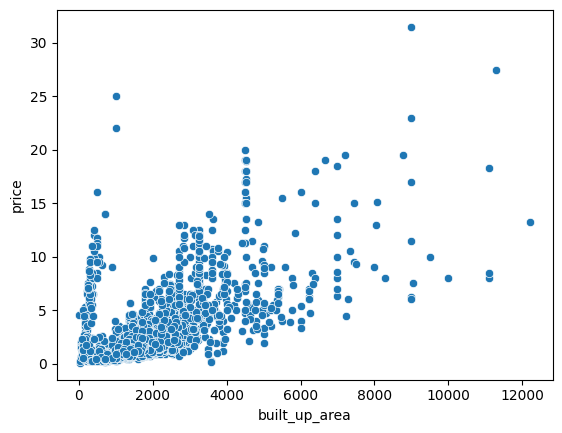

In [110]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [111]:
anamoly_df = df[(df['built_up_area']<2000) & (df['price']>2.5)][['price','area','built_up_area']]

In [112]:
anamoly_df.sample(5)

,price,area,built_up_area
3526,2.58,1458.0,1444.0
1182,6.00,1710.0,1778.0
992,6.80,2160.0,220.0
3413,7.35,1760.0,240.0
3282,5.70,2430.0,270.0


In [113]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [114]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

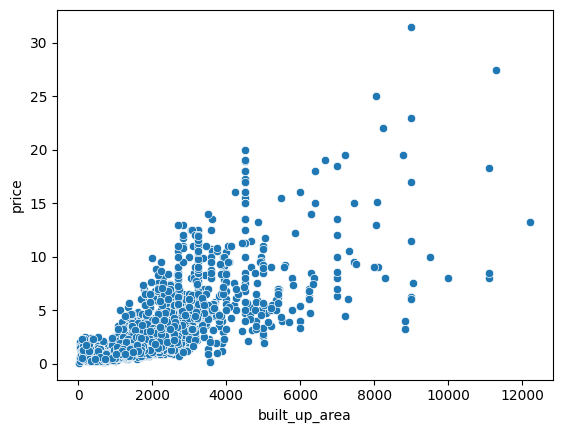

In [115]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [116]:
df.drop(columns=['area','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [117]:
df.isnull().sum()

property_type         0
sector                0
society               1
price                 0
price_per_sqft        0
built_up_area         0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1070
agePossession         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

# floorNum

In [118]:
df[df['floorNum'].isnull()]

,property_type,sector,society,price,price_per_sqft,built_up_area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
129,house,sector 4,independent,0.65,11111.11,585.0,4,2,2,NaN,NaN,Moderately Old,0,0,0,0,0,1,0
283,house,sector 3,independent,1.50,10288.07,210.0,3,3,0,NaN,NaN,Old Property,0,0,0,0,0,1,0
395,flat,dwarka expressway,experion heartsong,1.08,6150.34,1758.0,3,3,0,NaN,NaN,Under Construction,0,0,0,0,0,1,0
795,house,sector 48,vipul tatvam villa,8.50,26234.57,3240.0,4,4,1,NaN,NaN,Relatively New,0,0,0,0,0,1,21
1668,house,sector 4,independent,4.12,8888.89,4635.0,2,1,3+,NaN,NaN,Moderately Old,0,0,0,0,0,1,0
1705,house,sector 86,dlf new town heights,2.47,7718.75,2800.0,4,4,3+,NaN,West,Moderately Old,0,1,0,1,0,2,130
1826,house,sector 43,ansal sushant lok plots,3.30,26570.05,1242.0,1,1,0,NaN,NaN,Under Construction,0,0,0,0,0,1,0
1881,house,sector 48,vipul tatvam villa,8.50,26234.57,3240.0,4,4,2,NaN,East,Moderately Old,0,1,1,1,0,1,88
1893,house,sector 43,ansal sushant lok,10.50,27910.69,3762.0,4,4,2,NaN,North-East,Old Property,0,1,0,0,0,1,59
1981,house,sector 2,independent,5.60,17283.95,3240.0,8,6,3+,NaN,South-West,Moderately Old,1,1,1,1,0,1,0


In [119]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [120]:
df['floorNum'].fillna(2.0,inplace=True)

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1332/15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [121]:
df.isnull().sum()

property_type         0
sector                0
society               1
price                 0
price_per_sqft        0
built_up_area         0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1070
agePossession         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

# facing

<Axes: ylabel='count'>

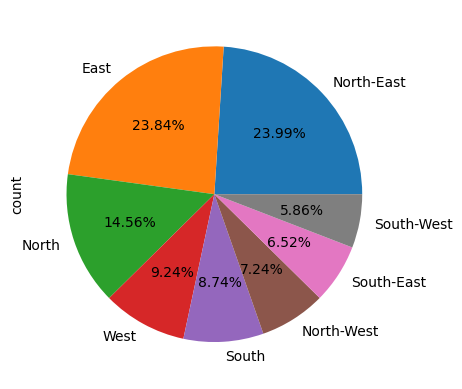

In [122]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [123]:
df.shape

(3679, 19)

In [124]:
df.drop(columns=['facing'],inplace=True)

In [125]:
df.isnull().sum()

property_type      0
sector             0
society            1
price              0
price_per_sqft     0
built_up_area      0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [126]:
df[df['society'].isnull()]

,property_type,sector,society,price,price_per_sqft,built_up_area,bedRoom,bathroom,balcony,floorNum,agePossession,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3594,flat,sector 78,NaN,0.6,3692.31,1625.0,2,2,0,2.0,Under Construction,0,0,0,0,0,1,0


In [127]:
df.drop(index=[3594],inplace=True)

# agePossession

In [128]:
df['agePossession'].value_counts()

agePossession
Relatively New        1633
New Property           590
Moderately Old         557
Undefined              318
Old Property           300
Under Construction     280
Name: count, dtype: int64

problem is here in undefined rows which we are considering as null values 

In [129]:
df[df['agePossession'] == 'Undefined']

,property_type,sector,society,price,price_per_sqft,built_up_area,bedRoom,bathroom,balcony,floorNum,agePossession,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
16,flat,sector 89,tulip petals,1.10,7096.77,1550.0,3,2,3,4.0,Undefined,0,0,0,0,0,1,0
25,house,sector 92,sare crescent parc royal greens phase 1,0.85,4876.65,1743.0,4,4,3,4.0,Undefined,0,0,0,0,0,1,0
30,house,sector 4,independent,0.85,7522.12,1130.0,3,3,0,1.0,Undefined,0,0,0,0,0,1,0
38,flat,sector 24,ambience caitriona,14.00,22222.22,6300.0,4,5,3,3.0,Undefined,0,0,0,0,0,1,0
52,flat,sector 103,chintamani,1.57,8509.49,1845.0,3,3,3,1.0,Undefined,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3756,flat,sector 90,shree vardhman flora,0.75,5769.23,1444.0,2,2,3,8.0,Undefined,0,0,0,0,0,1,60
3761,flat,sector 95,ramsons kshitij,0.30,3157.89,950.0,2,2,1,11.0,Undefined,0,0,0,0,0,1,0
3788,flat,sector 69,tulip lemon,0.60,11406.84,584.0,2,1,1,11.0,Undefined,0,0,0,0,0,1,0
3794,flat,sohna road,ashiana anmol,0.90,7058.82,1275.0,2,2,2,8.0,Undefined,0,0,0,0,0,1,0


In [130]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [131]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [132]:
df['agePossession'].value_counts()

agePossession
Relatively New        1760
New Property           632
Moderately Old         599
Old Property           334
Under Construction     297
Undefined               56
Name: count, dtype: int64

In [133]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # if mode_value is empty (no mode found), return NaN, otherwise return the mode

        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
        
    else:
        return row['agePossession']

In [134]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [135]:
df['agePossession'].value_counts()

agePossession
Relatively New        1769
New Property           633
Moderately Old         606
Old Property           340
Under Construction     297
Undefined               33
Name: count, dtype: int64

In [136]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()

        # if mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [137]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [138]:
df['agePossession'].value_counts()

agePossession
Relatively New        1771
Moderately Old         637
New Property           633
Old Property           340
Under Construction     297
Name: count, dtype: int64

In [139]:
df.isnull().sum()

property_type      0
sector             0
society            0
price              0
price_per_sqft     0
built_up_area      0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

# feature_selection

In [140]:
df.shape

(3678, 18)

In [141]:
df.head()

,property_type,sector,society,price,price_per_sqft,built_up_area,bedRoom,bathroom,balcony,floorNum,agePossession,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 86,ansal heights 86,0.78,5735.29,1360.0,2,2,2,8.0,New Property,0,0,0,0,0,1,72
1,flat,sector 103,indiabulls centrum park,1.05,5859.38,1365.0,2,2,3,1.0,Relatively New,0,0,0,0,0,2,51
2,flat,sector 70a,bptp astaire gardens,0.97,6585.20,1339.0,3,3,3+,1.0,Relatively New,0,0,0,0,1,1,149
3,flat,sector 69,tulip violet,2.05,9951.46,1889.0,4,4,2,0.0,Relatively New,0,0,0,0,0,1,157
5,flat,sector 92,bestech park view sanskruti,1.83,7870.97,2104.0,4,3,3,8.0,New Property,0,1,0,0,0,1,128


In [142]:
train_df = df.drop(columns=['society','price_per_sqft'])

<Axes: >

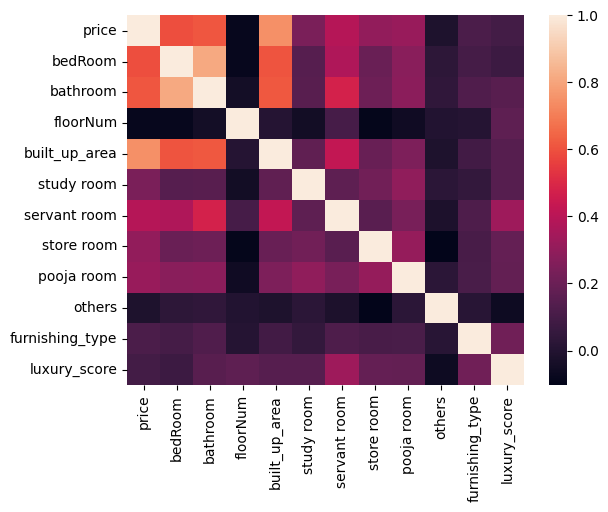

In [143]:
df_encoded = train_df.copy()
le = LabelEncoder()
df_encoded['furnishing_type'] = le.fit_transform(df_encoded['furnishing_type'].astype(str))

corr = df_encoded[['price','bedRoom','bathroom','floorNum','built_up_area',
                        'study room','servant room','store room','pooja room','others',
                        'furnishing_type','luxury_score']].corr()

sns.heatmap(corr)


In [144]:
corr['price'].sort_values(ascending=False)

price              1.000000
built_up_area      0.749627
bathroom           0.610945
bedRoom            0.591828
servant room       0.391121
pooja room         0.318723
store room         0.302270
study room         0.239973
furnishing_type    0.115674
luxury_score       0.093902
others            -0.016215
floorNum          -0.084317
Name: price, dtype: float64

cols doubtful for now:
1. numerical -> luxury_score, floorNum 
2. categorical -> property_type, sector, agePossession

## luxury score

<Axes: ylabel='luxury_score'>

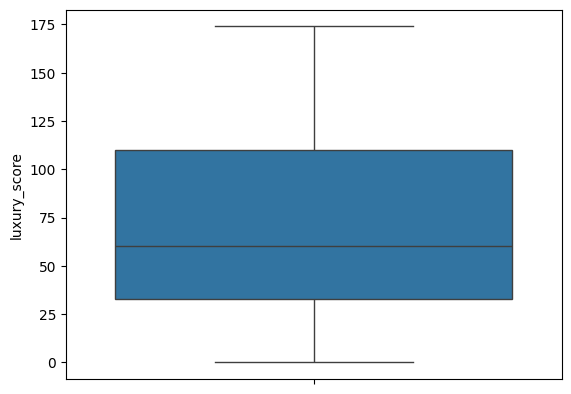

In [145]:
sns.boxplot(df['luxury_score'])

In [146]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <=175:
        return "High"
    else:
        return None

In [147]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [148]:
train_df.head()

,property_type,sector,price,built_up_area,bedRoom,bathroom,balcony,floorNum,agePossession,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 86,0.78,1360.0,2,2,2,8.0,New Property,0,0,0,0,0,1,72,Medium
1,flat,sector 103,1.05,1365.0,2,2,3,1.0,Relatively New,0,0,0,0,0,2,51,Medium
2,flat,sector 70a,0.97,1339.0,3,3,3+,1.0,Relatively New,0,0,0,0,1,1,149,Medium
3,flat,sector 69,2.05,1889.0,4,4,2,0.0,Relatively New,0,0,0,0,0,1,157,High
5,flat,sector 92,1.83,2104.0,4,3,3,8.0,New Property,0,1,0,0,0,1,128,Medium


# floorNum

<Axes: ylabel='floorNum'>

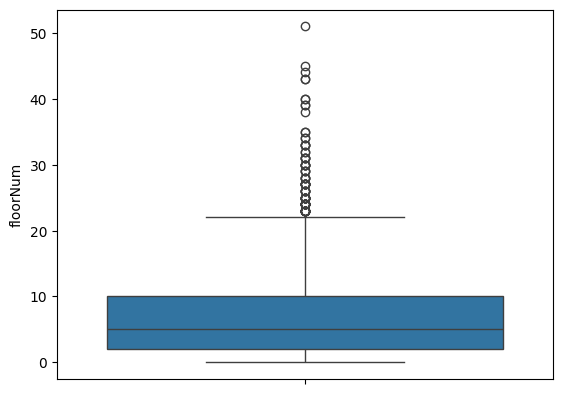

In [149]:
sns.boxplot(df['floorNum'])

In [150]:
def categorize_floor(floor):
    if 1 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None

In [151]:
train_df["floor_category"] = train_df["floorNum"].apply(categorize_floor)

In [152]:
train_df.head()

,property_type,sector,price,built_up_area,bedRoom,bathroom,balcony,floorNum,agePossession,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 86,0.78,1360.0,2,2,2,8.0,New Property,0,0,0,0,0,1,72,Medium,Mid Floor
1,flat,sector 103,1.05,1365.0,2,2,3,1.0,Relatively New,0,0,0,0,0,2,51,Medium,Low Floor
2,flat,sector 70a,0.97,1339.0,3,3,3+,1.0,Relatively New,0,0,0,0,1,1,149,Medium,Low Floor
3,flat,sector 69,2.05,1889.0,4,4,2,0.0,Relatively New,0,0,0,0,0,1,157,High,None
5,flat,sector 92,1.83,2104.0,4,3,3,8.0,New Property,0,1,0,0,0,1,128,Medium,Mid Floor


In [153]:
train_df.drop(columns=['luxury_score','floorNum'],inplace=True)

In [154]:
train_df.head()

,property_type,sector,price,built_up_area,bedRoom,bathroom,balcony,agePossession,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 86,0.78,1360.0,2,2,2,New Property,0,0,0,0,0,1,Medium,Mid Floor
1,flat,sector 103,1.05,1365.0,2,2,3,Relatively New,0,0,0,0,0,2,Medium,Low Floor
2,flat,sector 70a,0.97,1339.0,3,3,3+,Relatively New,0,0,0,0,1,1,Medium,Low Floor
3,flat,sector 69,2.05,1889.0,4,4,2,Relatively New,0,0,0,0,0,1,High,None
5,flat,sector 92,1.83,2104.0,4,3,3,New Property,0,1,0,0,0,1,Medium,Mid Floor


In [155]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3678 entries, 0 to 3802
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3678 non-null   object 
 1   sector           3678 non-null   object 
 2   price            3678 non-null   float64
 3   built_up_area    3678 non-null   float64
 4   bedRoom          3678 non-null   int64  
 5   bathroom         3678 non-null   int64  
 6   balcony          3678 non-null   object 
 7   agePossession    3678 non-null   object 
 8   study room       3678 non-null   int64  
 9   servant room     3678 non-null   int64  
 10  store room       3678 non-null   int64  
 11  pooja room       3678 non-null   int64  
 12  others           3678 non-null   int64  
 13  furnishing_type  3678 non-null   int64  
 14  luxury_category  3678 non-null   object 
 15  floor_category   3545 non-null   object 
dtypes: float64(2), int64(8), object(6)
memory usage: 488.5+ KB


In [156]:
train_df.to_csv('gurgaon_properties_post_feature_selection_2.csv',index=False) # columns without encoding and to be used in model_selection.ipynb file later (NOT AT ALL USED FOR THIS AND baseline.ipynb file)

In [157]:
from sklearn.preprocessing import OrdinalEncoder

data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns

for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 3',
       'sector 3 phase 2', 'sector 3 phase 3 extension', 'sector 30',
       'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
       'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 5

lekin mene ordinal encode karne k baad linear_reg use kiya (ya koi bhi linear function vala model use kiya toh) 
voh 3 ko jyda imp dega na.
And therefore will use one-hot encoding here.

But since our focus is on using tree-models then using ordinal encoding is okay.

In [158]:
# Splitting the dataset into training and testing sets 
X_label = data_label_encoded.drop('price',axis=1)
y_label = data_label_encoded['price']

### TECHNIQUE 1 - CORRELATION ANALYSIS 
to understand feature importance

<Axes: >

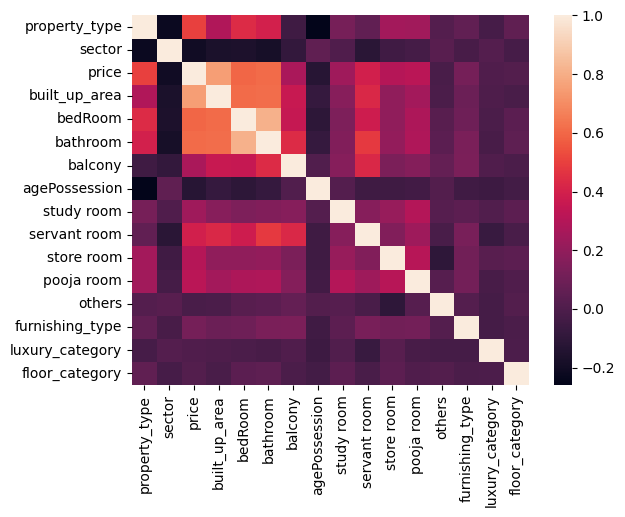

In [159]:
sns.heatmap(data_label_encoded.corr())

In [160]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.202428
1,price,1.000000
2,built_up_area,0.749627
3,bedRoom,0.591828
4,bathroom,0.610945
5,balcony,0.270583
6,agePossession,-0.130958
7,study room,0.239973
8,servant room,0.391121
9,store room,0.302270


### TECHNIQUE 2 - RANDOM FOREST FEATURE IMPORTANCE 
to understand feature importance

In [161]:
from sklearn.ensemble import RandomForestRegressor

# Train a random Forest regressor on lavel encoded data 
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

fi_df2 = pd.DataFrame({
    'feature':X_label.columns,
    'rf_importance':rf_label.feature_importances_
}).sort_values(by='rf_importance',ascending=False)

fi_df2

,feature,rf_importance
2,built_up_area,0.644377
1,sector,0.106059
0,property_type,0.102839
3,bedRoom,0.027957
4,bathroom,0.023506
8,servant room,0.020574
6,agePossession,0.013077
5,balcony,0.012050
12,furnishing_type,0.009730
7,study room,0.009062


### TECHNIQUE 3 - Gradient Boosting Feature importances 
to understand feature importance

In [162]:
from sklearn.ensemble import GradientBoostingRegressor

gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

fi_df3 = pd.DataFrame({
    'feature' : X_label.columns,
    'gb_importance' : gb_label.feature_importances_
}).sort_values(by='gb_importance',ascending=False)

fi_df3

,feature,gb_importance
2,built_up_area,0.677524
1,sector,0.106287
0,property_type,0.099136
3,bedRoom,0.039686
4,bathroom,0.033713
8,servant room,0.025302
9,store room,0.006577
7,study room,0.004495
6,agePossession,0.002770
12,furnishing_type,0.002233


### TECHNIQUE 4 - PERMUTATION IMPORTANCE
to understand feature importance

In [163]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label) #base model

perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

fi_df4 = pd.DataFrame({
    'feature' : X_label.columns,
    'permutation_importance':perm_importance.importances_mean
}).sort_values(by='permutation_importance',ascending=False)

fi_df4

,feature,permutation_importance
2,built_up_area,0.728542
0,property_type,0.195209
1,sector,0.172828
8,servant room,0.030676
3,bedRoom,0.016749
4,bathroom,0.013692
5,balcony,0.005518
6,agePossession,0.004165
7,study room,0.002177
12,furnishing_type,0.001997


# TECHNIQUE 5 - LASSO

In [164]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Build a lasso regression model 
# We'll use a realtively small value for alpha (the regularization strength) for demonstration purposes 

lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients 

fi_df5 = pd.DataFrame({
    'feature':X_label.columns,
    'lasso_coeff':lasso.coef_
}).sort_values(by='lasso_coeff',ascending=False)

fi_df5

,feature,lasso_coeff
2,built_up_area,1.506640
0,property_type,0.703424
4,bathroom,0.287214
9,store room,0.200359
7,study room,0.172438
8,servant room,0.167804
10,pooja room,0.085817
12,furnishing_type,0.041775
13,luxury_category,0.040256
3,bedRoom,0.011319


- we can see lasso_coeff for sector feature is is negative however it is an important feature. This is because of ordinal encoding.
- Other numerical columns are idetified well we can see.
- Hence this is not that reliable 

# TECHNIQUE 6 - RFE
recursive feature elimination

In [165]:
from sklearn.feature_selection import RFE

# initialize the base estimator
estimator  = RandomForestRegressor()

# apply RFE on the label-encoded and standardized training data 
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# get the selected features based on RFE 
selected_features = X_label.columns[selector_label.support_]

# extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# organize the results into a dataframe 
fi_df6 = pd.DataFrame({
    'feature':selected_features,
    'rfe_score':selected_coefficients
}).sort_values(by='rfe_score',ascending=False)

fi_df6

,feature,rfe_score
2,built_up_area,0.646435
0,property_type,0.104644
1,sector,0.101658
3,bedRoom,0.027051
4,bathroom,0.023602
8,servant room,0.022870
6,agePossession,0.014801
5,balcony,0.013145
12,furnishing_type,0.009405
7,study room,0.008800


# TECHNIQUE 7 - LINEAR REGRESSION WEIGHTS

In [166]:
# train a linear regression model on the label-encoded and standardized training data 
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_scaled,y_label)

# extract coefficients 
fi_df7 = pd.DataFrame({
    'feature':X_label.columns,
    'reg_coeffs' : lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
2,built_up_area,1.509692
0,property_type,0.701498
4,bathroom,0.294071
9,store room,0.204643
7,study room,0.181089
8,servant room,0.177442
10,pooja room,0.089411
12,furnishing_type,0.051270
13,luxury_category,0.051103
3,bedRoom,0.014403


Altho this is not reliable again due to ordinal encoding 

# TECHNIQUE 8 - SHAP

In [167]:
import shap 

# compute SHAP values using the trained random forest model
rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_label,y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# summing the absolute SHAP values across all sample to get an overall measure of feature importance 
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[-2.06805107e-01, -4.57468328e-01, -5.74437974e-01, ...,
        -1.26200902e-02, -2.63653449e-03, -1.02854779e-02],
       [-2.41565620e-01, -2.01769021e-01, -6.08590062e-01, ...,
         4.43946511e-04,  1.86343237e-03, -1.38083711e-02],
       [-1.88357020e-01, -1.52580532e-01, -9.06967360e-01, ...,
        -1.17107989e-02, -6.68845539e-03, -1.62180798e-02],
       ...,
       [-2.44555771e-01, -2.86450339e-01, -5.84660169e-01, ...,
         2.47175010e-03, -1.51932025e-03,  3.68672516e-02],
       [-1.02794598e+00,  6.83909649e-01,  2.45166540e+00, ...,
         3.47557401e-02, -1.05951764e-02, -2.42429304e-02],
       [-2.04032992e-01, -3.89545251e-01, -5.33901420e-01, ...,
        -1.64634061e-02, -1.23043029e-04,  1.29937634e-02]])

In [168]:
fi_df8 = pd.DataFrame({
    'feature':X_label.columns,
    'SHAP_score':np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score',ascending=False)

fi_df8

,feature,SHAP_score
2,built_up_area,1.228231
0,property_type,0.464904
1,sector,0.384540
4,bathroom,0.116572
8,servant room,0.092871
3,bedRoom,0.059505
5,balcony,0.041247
14,floor_category,0.026366
6,agePossession,0.025430
12,furnishing_type,0.025410


In [169]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature')

final_fi_df.set_index('feature', inplace=True)

final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.202428,0.106059,0.106287,0.172828,-0.052308,0.101658,-0.061075,0.384540
built_up_area,0.749627,0.644377,0.677524,0.728542,1.506640,0.646435,1.509692,1.228231
bedRoom,0.591828,0.027957,0.039686,0.016749,0.011319,0.027051,0.014403,0.059505
bathroom,0.610945,0.023506,0.033713,0.013692,0.287214,0.023602,0.294071,0.116572
balcony,0.270583,0.012050,0.001598,0.005518,-0.030310,0.013145,-0.053912,0.041247
agePossession,-0.130958,0.013077,0.002770,0.004165,-0.000000,0.014801,-0.001861,0.025430
study room,0.239973,0.009062,0.004495,0.002177,0.172438,0.008800,0.181089,0.019528
servant room,0.391121,0.020574,0.025302,0.030676,0.167804,0.022870,0.177442,0.092871
store room,0.302270,0.006389,0.006577,-0.019650,0.200359,0.005724,0.204643,0.012863


In [170]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0),axis=1)

In [171]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.710392
sector             0.143468
bathroom           0.032150
servant room       0.030743
bedRoom            0.030362
balcony            0.011127
agePossession      0.010172
furnishing_type    0.007643
study room         0.007330
floor_category     0.005789
luxury_category    0.003990
pooja room         0.003370
others             0.002188
store room         0.001277
dtype: float64

will drop pooja room, store room, others
- but before that we need to prove that these columns wont affect models performance 

In [172]:
from sklearn.model_selection import cross_val_score 

rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X_label, y_label, cv = 5, scoring='r2')

In [173]:
scores.mean()

0.808652831483452

In [174]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X_label.drop(columns=['pooja room','store room', 'others']), y_label, cv=5, scoring='r2')

In [175]:
scores.mean()

0.8080744554987926

In [176]:
export_df = X_label.drop(columns=['pooja room','study room','others'])
export_df['price'] = y_label

In [177]:
export_df.head()

,property_type,sector,built_up_area,bedRoom,bathroom,balcony,agePossession,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,98.0,1360.0,2,2,2.0,1.0,0,0,1,2.0,2.0,0.78
1,0.0,5.0,1365.0,2,2,3.0,3.0,0,0,2,2.0,1.0,1.05
2,0.0,81.0,1339.0,3,3,4.0,3.0,0,0,1,2.0,1.0,0.97
3,0.0,78.0,1889.0,4,4,2.0,3.0,0,0,1,0.0,3.0,2.05
5,0.0,105.0,2104.0,4,3,3.0,1.0,1,0,1,2.0,2.0,1.83


In [178]:
export_df.shape

(3678, 13)

In [180]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv',index=False)